# ***Step:1 _ Setting up the Environment***

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Step:2 _ Uploading the Dataset***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving boston_housing.csv to boston_housing.csv


# ***Step:3 _ Loading the Dataset into DataFrame***

In [3]:
df = pd.read_csv('boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# ***Step:4 _ Inspecting data for types, missing values, and outliers***

# (a) CHECKING SHAPE AND DATA TYPES

In [4]:
print("The Shape of the Dataset is (Rows,Columns) ", df.shape)

print("\n\nThe Data Type of all the columns is : " , df.dtypes)

The Shape of the Dataset is (Rows,Columns)  (506, 14)


The Data Type of all the columns is :  CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


# (b) CHECKING FOR THE MISSING VALUES

In [5]:
missing_counts = df.isna().sum()

if  missing_counts.sum() > 0:
  print("There are missing values in the Dataset\n")
  print(missing_counts[missing_counts > 0])
else:
  print("There are no missing values in the Dataset\n")

print(missing_counts)

There are no missing values in the Dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# (c) CHECKING FOR THE OUTLIERS

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# ***Step:5 _ Handling Missing Values***

In [12]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# ***Step:6 _ Detecting and Handling Outliers***

# (a) Detecting the outlier Boundries

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower boundry', lower_bound,"\n")
print('Upper boundry', upper_bound)


Lower boundry CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
MEDV         5.062500
dtype: float64 

Upper boundry CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
MEDV         36.962500
dtype: float64


# (b) Removing the Outliers

In [17]:
df_no_outliers = df[~(
    (df < lower_bound) | (df > upper_bound)
).any(axis=1)]

print("Original shape:", df.shape)
print("\nAfter removing outliers:", df_no_outliers.shape)

Original shape: (506, 14)

After removing outliers: (268, 14)


# (c) Visualizing the Dataset Before & after removing outliers

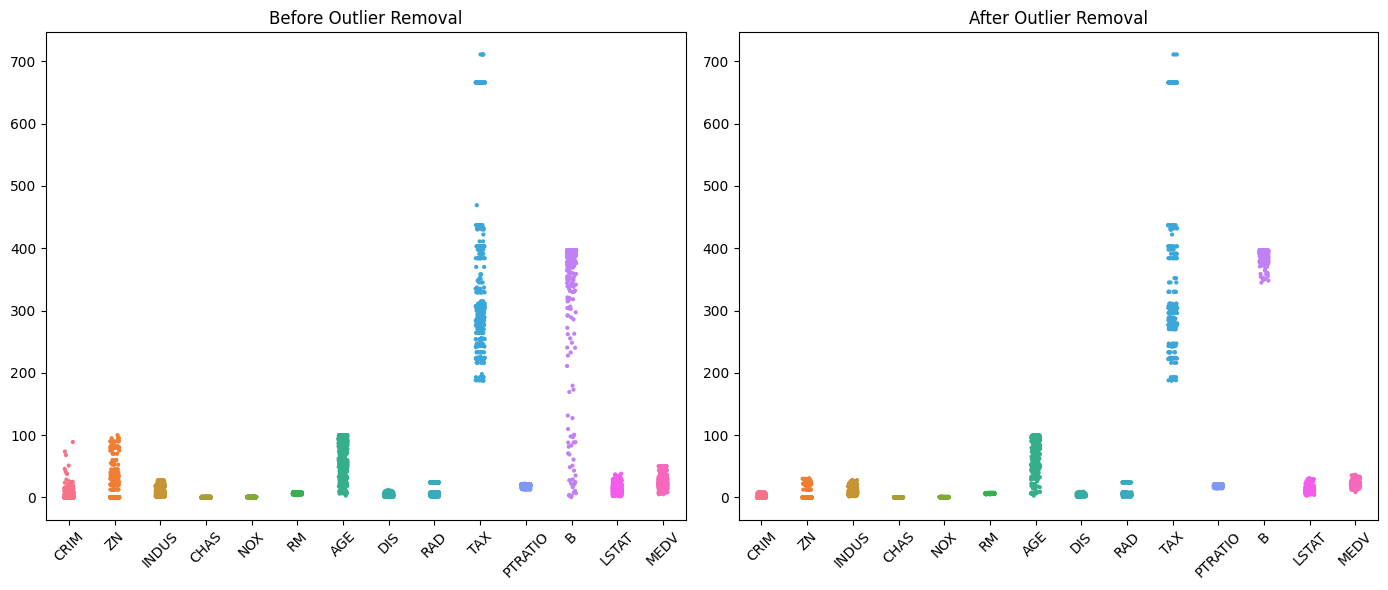

In [34]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.stripplot(data=df, size=3)
plt.title("Before Outlier Removal")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.stripplot(data=df_no_outliers, size=3)
plt.title("After Outlier Removal")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ***Step:7 _ Downlaoding the Cleaned Dataset***

In [30]:
df_no_outliers.to_csv("boston_cleaned.csv", index=False)

In [29]:
from google.colab import files
files.download("boston_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>